In [121]:
import pandas as pd
import numpy as np

In [122]:
encodings=["utf-8","latin1","ISO-8859-1","cp1252"]
file_path="spam.csv"
for encoding in encodings:
    try:
        df=pd.read_csv(file_path,encoding=encoding)
        print(f"file read with encoding:{encoding}")
        break
    except UnicodeDecodeError:
        print(f"failed to read with encoding:{encoding}")
        continue
if "df" in locals():
    print("successfully loaded")
else:
    print("failed to load")

failed to read with encoding:utf-8
file read with encoding:latin1
successfully loaded


In [123]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
2283,ham,I reach home safe n sound liao...,NaN,NaN,NaN
2504,ham,"Hello, my boytoy! I made it home and my consta...",NaN,NaN,NaN
3678,ham,Stupid.its not possible,NaN,NaN,NaN
2692,spam,Urgent Urgent! We have 800 FREE flights to Eur...,NaN,NaN,NaN
3699,ham,Oh...i asked for fun. Haha...take care. Ì_,NaN,NaN,NaN


In [124]:
df.shape

(5572, 5)

In [125]:
#  1.Data cleaning
#  2.EDA
#  3.Text Preprocessing
#  4.Model Building
#  5.Evolution
#  6.Improvement
#  7.Website
#  8.Deploy

# 1.Data Cleaning

In [126]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [127]:
#drop last 3 cols
df.drop(columns=["Unnamed: 2","Unnamed: 3","Unnamed: 4"],inplace=True)

In [128]:
df.sample(5)

,v1,v2
3632,ham,Hui xin is in da lib.
2189,ham,Yup i shd haf ard 10 pages if i add figures......
1288,ham,Happy new year to u too!
1488,ham,Tell them no need to investigate about me anyw...
3142,ham,Boy; I love u Grl: Hogolo Boy: gold chain kods...


In [129]:
#renaming the cols
df.rename(columns={"v1":"target","v2":"text"},inplace=True)
df.sample(5)

,target,text
5303,ham,"I can. But it will tell quite long, cos i have..."
2067,ham,Who's there say hi to our drugdealer
4057,ham,Hi di is yijue we're meeting at 7 pm at esapla...
3263,ham,I will send them to your email. Do you mind &...
1310,ham,"I.ll always be there, even if its just in spir..."


In [130]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()


In [131]:
df["target"]=encoder.fit_transform(df["target"])

In [132]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [133]:
#missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [134]:
#check for duplicate values
df.duplicated().sum()

403

In [135]:
#remove duplicates
df=df.drop_duplicates(keep="first")

In [136]:
df.duplicated().sum()

0

In [137]:
df.shape

(5169, 2)

### EDA

In [138]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [139]:
df["target"].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

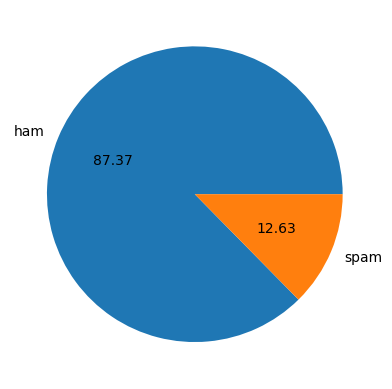

In [140]:
import matplotlib.pyplot as plt
plt.pie(df["target"].value_counts(),labels=["ham","spam"],autopct="%0.2f")
plt.show()

In [141]:
# big chunk of ham and very less spam so out data is not balanced

In [142]:
import nltk

In [23]:
pip install nltk

In [24]:
nltk.download("punkt")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\dell\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [143]:
df["num_characters"]=df["text"].apply(len)

In [144]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [145]:
# no.of words
df["num_words"]=df["text"].apply(lambda x:len(nltk.word_tokenize(x)))

In [146]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [147]:
# no.of sentences
df["num_sentences"]=df["text"].apply(lambda x:len(nltk.sent_tokenize(x)))

In [148]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [149]:
df[["num_characters","num_words","num_sentences"]].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [150]:
#targeting ham
df[df["target"]==0][["num_characters","num_words","num_sentences"]].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [151]:
#targeting spam
df[df["target"]==1][["num_characters","num_words","num_sentences"]].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [152]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

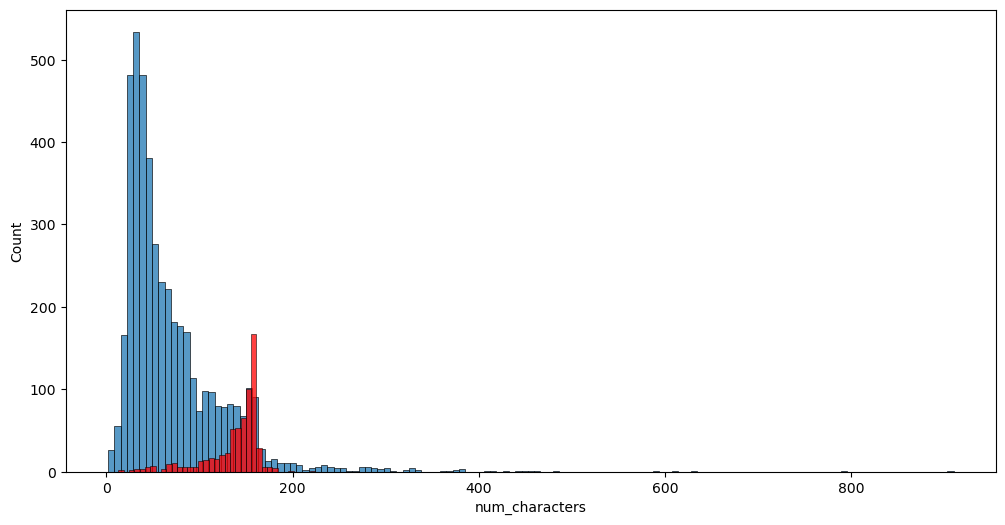

In [153]:
plt.figure(figsize=(12,6))
sns.histplot(df[df["target"]==0]["num_characters"])
sns.histplot(df[df["target"]==1]["num_characters"],color="red")

<Axes: xlabel='num_words', ylabel='Count'>

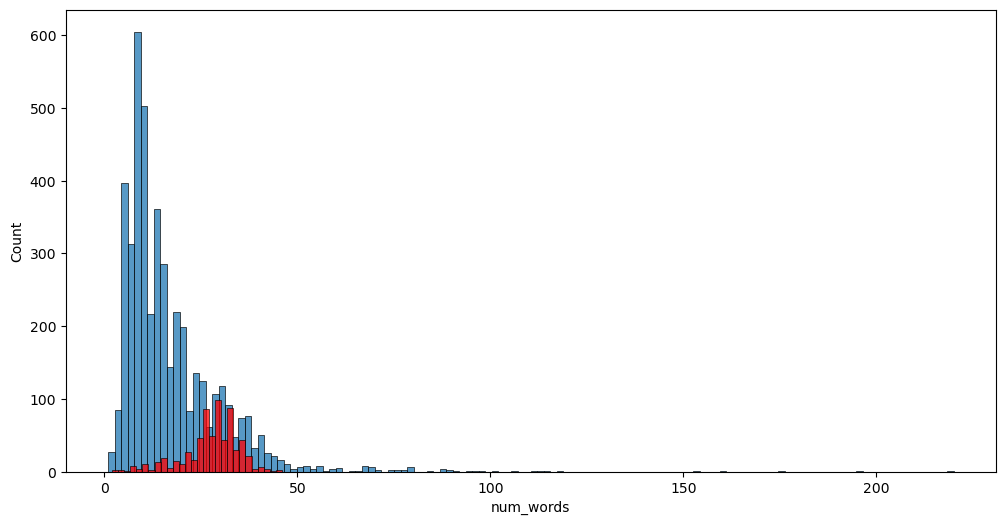

In [154]:
plt.figure(figsize=(12,6))
sns.histplot(df[df["target"]==0]["num_words"])
sns.histplot(df[df["target"]==1]["num_words"],color="red")

C:\Users\dell\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


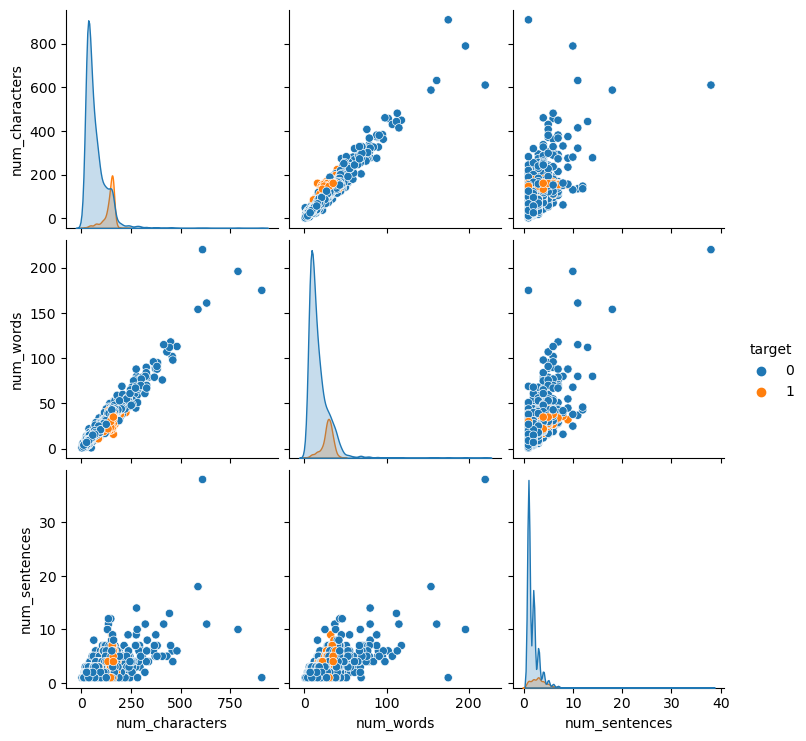

In [155]:
sns.pairplot(df,hue="target")

<Axes: >

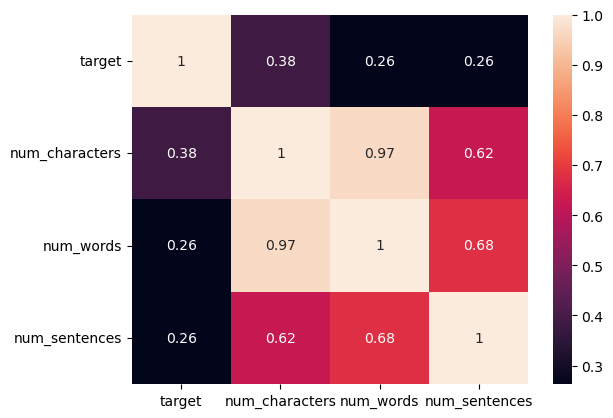

In [156]:
# Select only numerical columns
numerical_df = df.select_dtypes(include=['number'])

# Plot the heatmap
sns.heatmap(numerical_df.corr(), annot=True)

## Data Preprocessing
- lower case
- Tokenization
- Removing special chaarcters
- Removing stop words and punctuations
- Stemming

In [157]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import string

nltk.download("stopwords")

ps=PorterStemmer()
def transform_text(text):
    text=text.lower()
    text=nltk.word_tokenize(text)
    
    y=[]
    for i in text:
        if i not in stopwords.words("english") and i not in string.punctuation:
            y.append(i)
    text=y[:]
    y.clear()
    for i in text:
        y.append(ps.stem(i))
    return " ".join(y)
transformed_text=transform_text("i am gonna be home")
print(transformed_text)
    
    

gon na home


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\dell\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [158]:
import string
from nltk.corpus import stopwords

def transform_text(text):
    y = []
    text = text.lower().split()
    y.clear()
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    text = y[:]
    return text

# Example usage
transformed_text = transform_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.")
print(transformed_text)

["i'm", 'gonna', 'home', 'soon', 'want', 'talk', 'stuff', 'anymore', 'tonight,', 'k?', "i've", 'cried', 'enough', 'today.']


In [159]:
df["text"][10]

"I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."

In [160]:
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()
ps.stem("loving")

'love'

In [161]:
df["transformed_text"]=df["text"].apply(transform_text)

In [162]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,"[go, jurong, point,, crazy.., available, bugis..."
1,0,Ok lar... Joking wif u oni...,29,8,2,"[ok, lar..., joking, wif, u, oni...]"
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,"[free, entry, 2, wkly, comp, win, fa, cup, fin..."
3,0,U dun say so early hor... U c already then say...,49,13,1,"[u, dun, say, early, hor..., u, c, already, sa..."
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,"[nah, think, goes, usf,, lives, around, though]"


In [129]:
pip install wordcloud

In [163]:
from wordcloud import WordCloud
wc=WordCloud(width=500,height=500,min_font_size=10,background_color="white")

In [164]:
# Convert non-string values to strings
df['transformed_text'] = df['transformed_text'].astype(str)

# Concatenate the transformed text of spam messages
spam_text = df[df['target'] == 1]['transformed_text'].str.cat(sep=" ")

# Now you can proceed to generate the word cloud

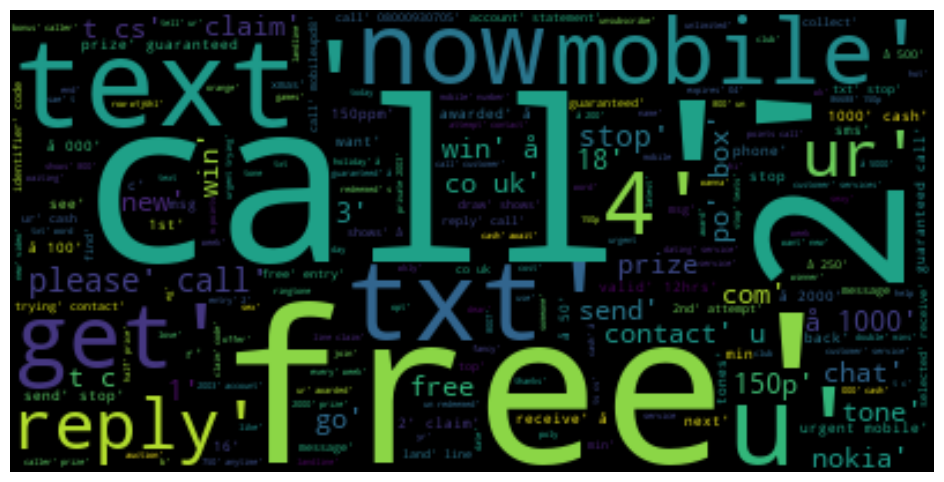

In [165]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Generate the word cloud
wc = WordCloud()
spam_wc = wc.generate(spam_text)

# Convert word cloud to image
spam_image = spam_wc.to_image()

# Display the image
plt.figure(figsize=(15, 6))
plt.imshow(spam_image, interpolation='bilinear')
plt.axis('off')  # Hide axes
plt.show()

In [166]:
ham_wc=wc.generate(df[df["target"]==0]["transformed_text"].str.cat(sep=" "))

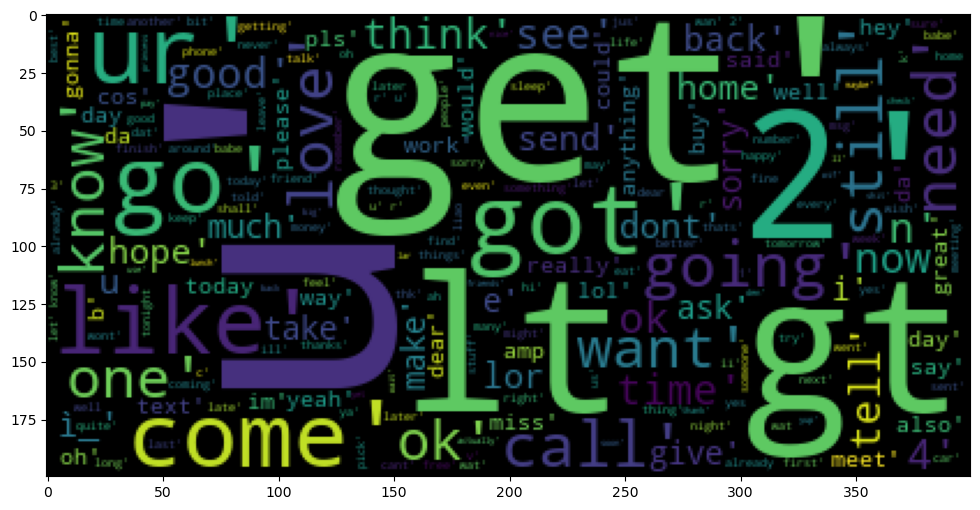

In [167]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [168]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,"['go', 'jurong', 'point,', 'crazy..', 'availab..."
1,0,Ok lar... Joking wif u oni...,29,8,2,"['ok', 'lar...', 'joking', 'wif', 'u', 'oni...']"
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,"['free', 'entry', '2', 'wkly', 'comp', 'win', ..."
3,0,U dun say so early hor... U c already then say...,49,13,1,"['u', 'dun', 'say', 'early', 'hor...', 'u', 'c..."
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,"['nah', 'think', 'goes', 'usf,', 'lives', 'aro..."


In [169]:
spam_corpus=[]
for msg in df[df["target"]==1]["transformed_text"].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [170]:
len(spam_corpus)

11075

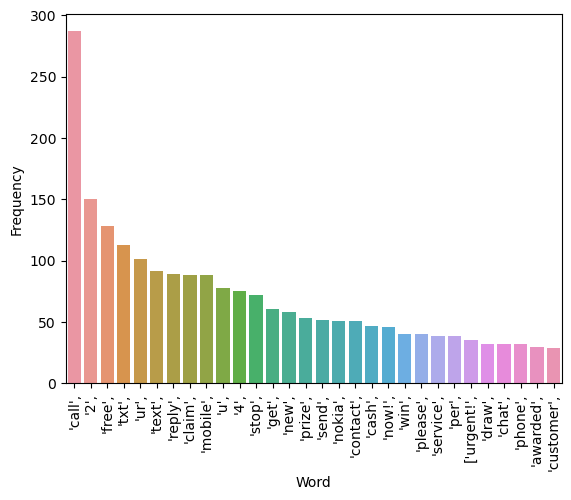

In [171]:
from collections import Counter
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming spam_corpus is your list of words
spam_counter = Counter(spam_corpus)
most_common_words = spam_counter.most_common(30)
most_common_words_df = pd.DataFrame(most_common_words, columns=['Word', 'Frequency'])

# Create the bar plot
sns.barplot(x='Word', y='Frequency', data=most_common_words_df)
plt.xticks(rotation='vertical')
plt.show()

In [172]:
ham_corpus = []
for msg in df[df['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)


In [173]:
len(ham_corpus)

38352

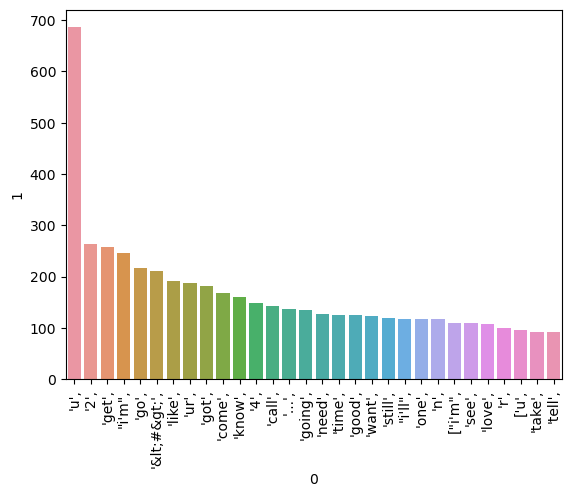

In [174]:
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt

# Get the most common words and their counts from the Counter object
ham_common_words = pd.DataFrame(Counter(ham_corpus).most_common(30))

# Create a bar plot
sns.barplot(x=ham_common_words[0], y=ham_common_words[1])
plt.xticks(rotation='vertical')
plt.show()

In [175]:
# text vectorization
#using bag of words
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,"['go', 'jurong', 'point,', 'crazy..', 'availab..."
1,0,Ok lar... Joking wif u oni...,29,8,2,"['ok', 'lar...', 'joking', 'wif', 'u', 'oni...']"
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,"['free', 'entry', '2', 'wkly', 'comp', 'win', ..."
3,0,U dun say so early hor... U c already then say...,49,13,1,"['u', 'dun', 'say', 'early', 'hor...', 'u', 'c..."
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,"['nah', 'think', 'goes', 'usf,', 'lives', 'aro..."


## 4.Building the model

In [176]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv=CountVectorizer()
tfidf=TfidfVectorizer(max_features=3000)

In [177]:
X=tfidf.fit_transform(df["transformed_text"]).toarray()

In [178]:
X.shape

(5169, 3000)

In [179]:
y=df["target"].values

In [180]:
from sklearn.model_selection import train_test_split

In [181]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [182]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score


In [183]:
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [184]:
gnb.fit(X_train,y_train)
y_pred1=gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8974854932301741
[[810  86]
 [ 20 118]]
0.5784313725490197


In [185]:
mnb.fit(X_train,y_train)
y_pred2=mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9796905222437138
[[896   0]
 [ 21 117]]
1.0


In [186]:
bnb.fit(X_train,y_train)
y_pred3=bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9874274661508704
[[896   0]
 [ 13 125]]
1.0


In [149]:
pip install xgboost


  Obtaining dependency information for xgboost from https://files.pythonhosted.org/packages/24/ec/ad387100fa3cc2b9b81af0829b5ecfe75ec5bb19dd7c19d4fea06fb81802/xgboost-2.0.3-py3-none-win_amd64.whl.metadata
  Using cached xgboost-2.0.3-py3-none-win_amd64.whl.metadata (2.0 kB)
   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------

   ---------------------------------------- 0.4/99.8 MB 51.9 kB/s eta 0:31:54
   ---------------------------------------- 0.4/99.8 MB 51.9 kB/s eta 0:31:54
   ---------------------------------------- 0.4/99.8 MB 51.9 kB/s eta 0:31:54
   ---------------------------------------- 0.4/99.8 MB 51.9 kB/s eta 0:31:54
   ---------------------------------------- 0.4/99.8 MB 51.9 kB/s eta 0:31:54
   ---------------------------------------- 0.4/99.8 MB 51.9 kB/s eta 0:31:54
   ---------------------------------------- 0.4/99.8 MB 51.9 kB/s eta 0:31:54
   ---------------------------------------- 0.4/99.8 MB 51.9 kB/s eta 0:31:54
   ---------------------------------------- 0.4/99.8 MB 51.9 kB/s eta 0:31:54
   ---------------------------------------- 0.4/99.8 MB 51.9 kB/s eta 0:31:54
   ---------------------------------------- 0.4/99.8 MB 51.9 kB/s eta 0:31:54
   ---------------------------------------- 0.4/99.8 MB 51.9 kB/s eta 0:31:54
   ---------------------------------------- 0.4/99.8 MB 51.9 kB/

In [187]:
# tfidf --> MNB

In [188]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC 
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [189]:
svc = SVC(kernel= 'sigmoid', gamma=1.0) 

knc = KNeighborsClassifier()

mnb= MultinomialNB()

dtc = DecisionTreeClassifier(max_depth=5) 

lrc =LogisticRegression (solver= 'liblinear', penalty= 'l1')

rfc = RandomForestClassifier(n_estimators=50, random_state=2)

abc = AdaBoostClassifier(n_estimators=50, random_state=2)

bc = BaggingClassifier(n_estimators=50, random_state=2)

etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)

xgb = XGBClassifier(n_estimators=50,random_state=2)

In [190]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [191]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred=clf.predict(X_test)
    accuracy=accuracy_score(y_test,y_pred)
    precision=precision_score(y_test,y_pred)
    return accuracy,precision

In [192]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.9796905222437138, 0.975609756097561)

In [193]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9796905222437138
Precision -  0.975609756097561
For  KN
Accuracy -  0.9042553191489362
Precision -  1.0
For  NB
Accuracy -  0.9796905222437138
Precision -  1.0
For  DT
Accuracy -  0.9439071566731141
Precision -  0.8773584905660378
For  LR
Accuracy -  0.9545454545454546
Precision -  0.9504950495049505
For  RF
Accuracy -  0.9758220502901354
Precision -  0.9829059829059829
For  AdaBoost
Accuracy -  0.9671179883945842
Precision -  0.956140350877193
For  BgC
Accuracy -  0.9613152804642167
Precision -  0.8769230769230769
For  ETC
Accuracy -  0.9777562862669246
Precision -  0.9752066115702479
For  GBDT
Accuracy -  0.9468085106382979
Precision -  0.9029126213592233
For  xgb
Accuracy -  0.971953578336557
Precision -  0.957983193277311


In [194]:
performance_df=pd.DataFrame({"Algorithm":clfs.keys(),"Accuracy":accuracy_scores,"Precision":precision_scores}).sort_values("Precision",ascending=False)

In [195]:
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.904255,1.000000
2,NB,0.979691,1.000000
5,RF,0.975822,0.982906
0,SVC,0.979691,0.975610
8,ETC,0.977756,0.975207
10,xgb,0.971954,0.957983
6,AdaBoost,0.967118,0.956140
4,LR,0.954545,0.950495
9,GBDT,0.946809,0.902913
3,DT,0.943907,0.877358


In [196]:
performance_df1=pd.melt(performance_df,id_vars="Algorithm")

In [197]:
performance_df1

,Algorithm,variable,value
0,KN,Accuracy,0.904255
1,NB,Accuracy,0.979691
2,RF,Accuracy,0.975822
3,SVC,Accuracy,0.979691
4,ETC,Accuracy,0.977756
5,xgb,Accuracy,0.971954
6,AdaBoost,Accuracy,0.967118
7,LR,Accuracy,0.954545
8,GBDT,Accuracy,0.946809
9,DT,Accuracy,0.943907


C:\Users\dell\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


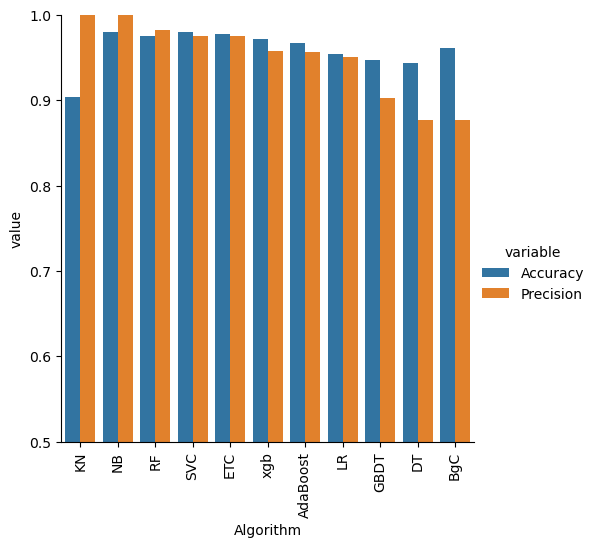

In [198]:
sns.catplot(x = 'Algorithm', y='value', 
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [199]:
# model improve
# 1. Change the max_features parameter of TfIdf

In [200]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)

In [201]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores}).sort_values('Precision_scaling',ascending=False)

In [202]:
new_df = performance_df.merge(temp_df,on='Algorithm')

In [203]:
new_df_scaled = new_df.merge(temp_df,on='Algorithm')

In [204]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_num_chars':accuracy_scores,'Precision_num_chars':precision_scores}).sort_values('Precision_num_chars',ascending=False)

In [205]:
new_df_scaled.merge(temp_df,on='Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_scaling_x,Precision_scaling_x,Accuracy_scaling_y,Precision_scaling_y,Accuracy_num_chars,Precision_num_chars
0,KN,0.904255,1.000000,0.904255,1.000000,0.904255,1.000000,0.904255,1.000000
1,NB,0.979691,1.000000,0.979691,1.000000,0.979691,1.000000,0.979691,1.000000
2,RF,0.975822,0.982906,0.975822,0.982906,0.975822,0.982906,0.975822,0.982906
3,SVC,0.979691,0.975610,0.979691,0.975610,0.979691,0.975610,0.979691,0.975610
4,ETC,0.977756,0.975207,0.977756,0.975207,0.977756,0.975207,0.977756,0.975207
5,xgb,0.971954,0.957983,0.971954,0.957983,0.971954,0.957983,0.971954,0.957983
6,AdaBoost,0.967118,0.956140,0.967118,0.956140,0.967118,0.956140,0.967118,0.956140
7,LR,0.954545,0.950495,0.954545,0.950495,0.954545,0.950495,0.954545,0.950495
8,GBDT,0.946809,0.902913,0.946809,0.902913,0.946809,0.902913,0.946809,0.902913
9,DT,0.943907,0.877358,0.943907,0.877358,0.943907,0.877358,0.943907,0.877358


In [206]:
# Voting Classifier
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier

In [207]:
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)],voting='soft')

In [208]:
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [209]:
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9845261121856866
Precision 0.9841269841269841


In [210]:
# Applying stacking
estimators=[('svm', svc), ('nb', mnb), ('et', etc)]
final_estimator=RandomForestClassifier()

In [211]:
from sklearn.ensemble import StackingClassifier

In [223]:
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [225]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))

In [226]:
import pickle
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB

#sample text data and corresponding labels (replace with your actual data
X_train=["Sample text 1","Sample text 2","Sample text 3"]
y_train=[0,1,0] #example labels (0 for negative,1 for positive)

#create and train the TF-IDF vectorizer
tfidf=TfidfVectorizer(lowercase=True,stop_words="english")
X_train_tfidf=tfidf.fit_transform(X_train)

#create and train the naive bayes classifier
mnb=MultinomialNB()
mnb.fit(X_train_tfidf,y_train)

#save and trained TF-IDF vectorizer and naive bayes model to files
with open("vectorizer.pkl","wb") as vectorizer_file:
    pickle.dump(tfidf,vectorizer_file)
with open("model.pkl","wb") as model_file:
    pickle.dump(mnb,model_file)

In [227]:
nltk.download("stopwords")
nltk.download("punkt")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\dell\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\dell\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [228]:
import pandas as pd
import numpy as np

# Example data
data = [
    ("Congratulations! You've won a $1,000 Walmart gift card. Click here to claim your prize now: http://spamlink.com", 1),
    ("Hi there, I hope you are doing well. Just wanted to catch up.", 0),
    ("Urgent! Your account has been compromised. Click here to secure it: http://spamlink.com", 1),
    ("Reminder: Your appointment is scheduled for tomorrow at 10 AM.", 0),
    ("Win a brand new car! Just click here to participate: http://spamlink.com", 1),
    ("Hello, we are having a meeting tomorrow at 9 AM. Please be on time.", 0),
    ("You have been selected for a chance to get a $500 Amazon gift card. Don't miss out!", 1),
    ("Hey, can we reschedule our meeting to next week?", 0),
    ("Limited time offer! Buy one get one free on all items. Visit http://spamlink.com", 1),
    ("It was great seeing you last week. Let's catch up again soon!", 0),
]

# Convert to DataFrame
df = pd.DataFrame(data, columns=['message', 'label'])


In [229]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import string

# Download stopwords
nltk.download("stopwords")
nltk.download("punkt")

ps = PorterStemmer()

def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    y = []
    for i in text:
        if i.isalnum():
            if i not in stopwords.words('english') and i not in string.punctuation:
                y.append(ps.stem(i))
    return " ".join(y)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\dell\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\dell\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [230]:
# Apply preprocessing
df['transformed_message'] = df['message'].apply(transform_text)

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pickle

# Vectorize the text
tfidf = TfidfVectorizer()
X = tfidf.fit_transform(df['transformed_message'])
y = df['label']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = MultinomialNB()
model.fit(X_train, y_train)

MultinomialNB()

In [231]:
# Evaluate the model
y_pred = model.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Precision: {precision_score(y_test, y_pred)}")
print(f"Recall: {recall_score(y_test, y_pred)}")
print(f"F1 Score: {f1_score(y_test, y_pred)}")

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0


In [232]:
# Save the model and vectorizer
with open("model.pkl", "wb") as model_file:
    pickle.dump(model, model_file)
with open("vectorizer.pkl", "wb") as vectorizer_file:
    pickle.dump(tfidf, vectorizer_file)

In [233]:
# Load the saved vectorizer and model
tfidf = pickle.load(open("vectorizer.pkl", "rb"))
model = pickle.load(open("model.pkl", "rb"))

# Example messages for testing
test_messages = [
    "Congratulations! You've won a $1,000 Walmart gift card. Click here to claim your prize now: http://spamlink.com",
    "Hi there, I hope you are doing well. Just wanted to catch up."
]

# Preprocess and vectorize the messages
transformed_messages = [transform_text(msg) for msg in test_messages]
vectorized_messages = tfidf.transform(transformed_messages)

# Predict
predictions = model.predict(vectorized_messages)
for msg, pred in zip(test_messages, predictions):
    print(f"Message: {msg}\nPrediction: {'Spam' if pred == 1 else 'Not Spam'}\n")



Message: Congratulations! You've won a $1,000 Walmart gift card. Click here to claim your prize now: http://spamlink.com
Prediction: Spam

Message: Hi there, I hope you are doing well. Just wanted to catch up.
Prediction: Not Spam



In [234]:
import streamlit as st
import pickle
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import string

# Load the saved vectorizer and model
tfidf = pickle.load(open("vectorizer.pkl", "rb"))
model = pickle.load(open("model.pkl", "rb"))

# Download stopwords
nltk.download("stopwords")
nltk.download("punkt")

ps = PorterStemmer()

def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    y = []
    for i in text:
        if i.isalnum():
            if i not in stopwords.words('english') and i not in string.punctuation:
                y.append(ps.stem(i))
    return " ".join(y)

# Streamlit code
st.title("Email Spam Classifier")
input_sms = st.text_area("Enter message")

if st.button("Predict"):
    try:
        transformed_sms = transform_text(input_sms)
        vector_input = tfidf.transform([transformed_sms])
        result = model.predict(vector_input)[0]
        if result != 1:
            st.header("Spam")
        else:
            st.header("Not Spam")
    except Exception as e:
        st.error(f"An error occurred: {e}")


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\dell\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\dell\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
2024-05-17 15:04:07.221 
  command:

    streamlit run C:\Users\dell\anaconda3\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]
2024-05-17 15:04:07.228 Session state does not function when running a script without `streamlit run`


In [235]:
streamlit run app.py


SyntaxError: invalid syntax (507122745.py, line 1)